# Masks
mask is a boolean array that specifies which pixels are valid to be used in the computation of the histogram.


Logical operation result in True/False at each pixel

In [71]:
import numpy as np

mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mask = mat > 5

print(mask)

[[False False False]
 [False False  True]
 [ True  True  True]]


In [92]:
import imageio

im = imageio.imread('../../data/photos/skeletal-hand.png')

C:\Users\aky\AppData\Local\Temp\ipykernel_20676\1246726217.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('../../data/photos/skeletal-hand.png')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


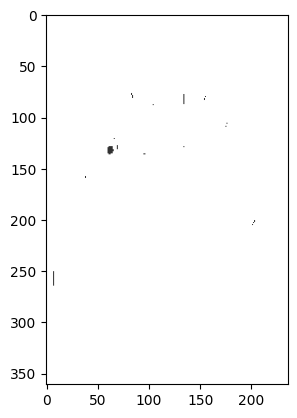

In [94]:
cdf = hist.cumsum()/ hist.sum()
cdf.shape
im_equalized = cdf[im] * 255
plt.imshow(im_equalized, cmap='gray')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

hist =  ndi.histogram(im, 0, max=255, bins= 256)
plt.plot(hist)
plt.show()

NameError: name 'im' is not defined

In [101]:
im.shape

(361, 236, 4)

In [102]:
# image to black and white
from skimage import color

# png to gray
im_gray = color.rgb2gray(im)

ValueError: the input array must have size 3 along `channel_axis`, got (361, 236, 4)

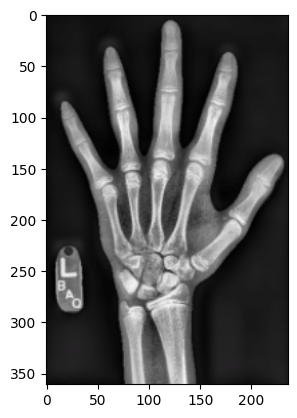

In [100]:
plt.imshow(im, cmap='gray')
plt.show()

In [97]:
mask1 = im < 32
plt.imshow(mask1, cmap='gray')
plt.show()

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>

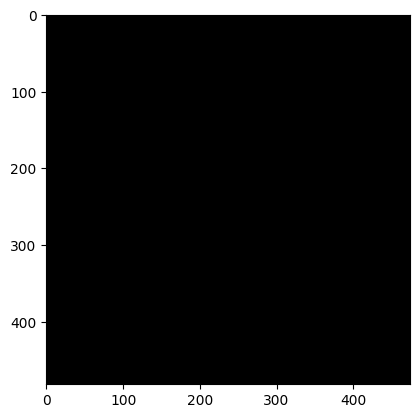

In [79]:
mask2 = im > 64
plt.imshow(mask2, cmap='gray')
plt.show()

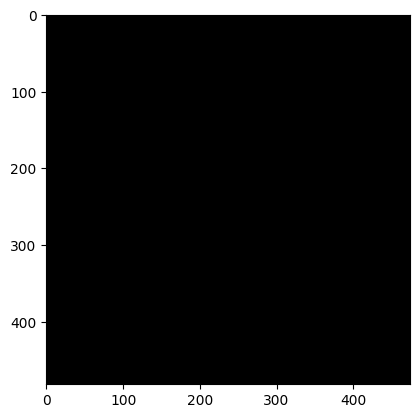

In [80]:
mask3 = mask1 & ~mask2
plt.imshow(mask3, cmap='gray')

# Applying masks
np.where(condition, x, y)

controls what data passes through he mask

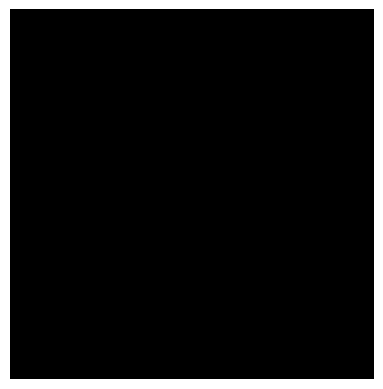

In [81]:
im_bone = np.where(im > 64, im, 0)
plt.imshow(im_bone, cmap='gray')
plt.axis('off') 
plt.show()

In [82]:
def show(im):
    plt.imshow(im, cmap='gray')
    plt.axis('off') 
    plt.show()

# Tuning Masks

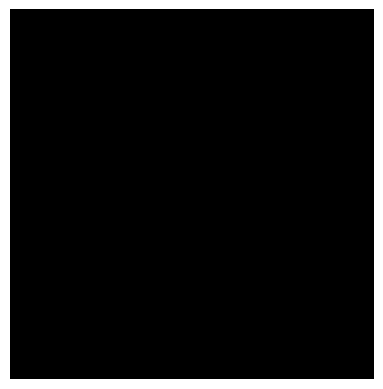

In [83]:
m = np.where(im > 64, 1, 0)
show(m)

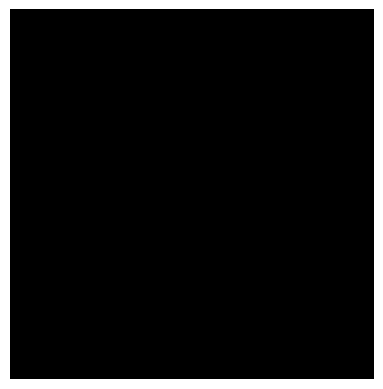

In [84]:
show(ndi.binary_dilation(m, iterations=5))

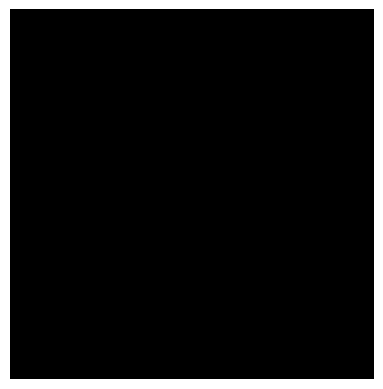

In [85]:
show(ndi.binary_erosion(m, iterations=5))

In [1]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot()

NameError: name 'im' is not defined

In [ ]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
format_and_render_plot()